### Custom distance metrics for 3rd order tensors
#### Norm-based distance metrics
Suppose $\mathbf{X} \in \mathbb{R}^{l \times m \times n}$ and $\mathbf{Y} \in \mathbb{R}^{l \times m \times n}$ are the two tensors, we define the distance metric between them, induced by a general norm, as

\begin{eqnarray}
d(\mathbf{X}, \mathbf{Y}) &=& \|\mathbf{X} - \mathbf{Y}\|_{p,q,r} \\
&=& \left( \sum_{i=1}^l \left( \sum_{j=1}^m \left( \sum_{k=1}^n |X_{ijk} \,-\, Y_{ijk}|^r \right)^{\frac{q}{r}} \right)^{\frac{p}{q}} \right)^{\frac{1}{p}}
\end{eqnarray}

This can be seen as a direct extension of the entrywise matrix norms defined, for example, [here](https://en.wikipedia.org/wiki/Matrix_norm#L2,1_and_Lp,q_norms). The norm is defined by the parameters $p, q, r$, which should be integers greater than $0$. The following three special cases of the distance metric should be useful in practice for high dimensional data:  
- $p = q = r = 1$: Similar to the Manhattan distance between vectors.
- $p = q = r = 2$: Similar to the Euclidean distance between vectors or Frobenius norm distance between matrices.
- $p = 1, q = r = 2$: In this case, the distance is the sum of Frobenius norm distances between the matrix slices along the second and third dimensions.

#### Cosine angular distance
This is a distance measure between two tensors derived from the cosine similarity. Note that this may not be a distance metric in the true sense because the triangle inequality may not be satisfied. Recall that for two vector inputs $\mathbf{a}$ and $\mathbf{b}$, suppose $S_{\cos}(\mathbf{a}, \mathbf{b})$ is their cosine similarity in the range $[-1, 1]$, the angular distance between them is defined as $\,d_a(\mathbf{a}, \mathbf{b}) = \frac{1}{\pi} \,\arccos(S_{\cos}(\mathbf{a}, \mathbf{b}))$, which has range $[0, 1]$. 

The cosine similarity between two matrices $\mathbf{A}$ and $\mathbf{B}$ of compatible dimensions is defined as

\begin{eqnarray}
S_{\cos}(\mathbf{A}, \mathbf{B}) &=& \frac{<\mathbf{A}, \mathbf{B}>}{\|\mathbf{A}\|_F \,\|\mathbf{B}\|_F} \\ 
&=& \frac{tr(\mathbf{A}^T \,\mathbf{B})}{\sqrt{tr(\mathbf{A}^T \,\mathbf{A}) tr(\mathbf{B}^T \,\mathbf{B})}}.
\end{eqnarray}

In the case of tensors, we first calculate the average cosine similarity between the individual matrix slices (along the second and third dimension) as follows,

$$
S_{\cos}(\mathbf{X}, \mathbf{Y}) ~=~ \frac{1}{l} \sum_{i=1}^l \frac{tr(\mathbf{X_i}^T \,\mathbf{Y_i})}{\sqrt{tr(\mathbf{X_i}^T \,\mathbf{X_i}) tr(\mathbf{Y_i}^T \,\mathbf{Y_i})}},
$$  
where $\mathbf{X_i}$ and $\mathbf{Y_i}$ are the matrix slices of size $m \times n$. The angular cosine distance between the tensors is then defined as

$$d_a(\mathbf{X}, \mathbf{Y}) ~=~ \arccos(S_{\cos}(\mathbf{X}, \mathbf{Y}))$$.


In [1]:
import numpy as np
import metrics_custom
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Suppress annoying numba warning
import warnings
from numba import NumbaPendingDeprecationWarning
warnings.filterwarnings('ignore', '', NumbaPendingDeprecationWarning)

In [3]:
# Shape of the tensors. Specified as an integer instead of a tuple to avoid errors related to `numba`
shape = (2, 3, 4)

# xt = 2 * np.ones(shape)
xt = np.random.randn(*shape)
# Flatten into a vector before calling the distance function
x = xt.reshape(-1)

# yt = np.ones(shape)
yt = np.random.randn(*shape)
y = yt.reshape(-1)

# The norm parameters `p, q, r` are specified as a tuple to the keyword argument `norm_type`. 
# For example, `p = q = r = 2` is specified as `norm_type=(2, 2, 2)`.
d = metrics_custom.distance_norm_3tensors(x, y, shape=shape, norm_type=(1, 1, 1))
print("p = q = r = 1: distance = {:f}".format(d))

d = metrics_custom.distance_norm_3tensors(x, y, shape=shape, norm_type=(2, 2, 2))
print("p = q = r = 2: distance = {:f}".format(d))

d = metrics_custom.distance_norm_3tensors(x, y, shape=shape, norm_type=(1, 2, 2))
print("p = 1, q = r = 2: distance = {:f}".format(d))

d = metrics_custom.distance_angular_3tensors(x, y, shape=shape)
print("Cosine angular distance = {:f}".format(d))

p = q = r = 1: distance = 26.168110
p = q = r = 2: distance = 6.735648
p = 1, q = r = 2: distance = 9.025438
Cosine angular distance = 1.485832


### Special cases of the norm-based distance metrics
It can be shown that when $p = \infty$ and $q, r < \infty$, the distance metric reduces to

$$
\|\mathbf{X} - \mathbf{Y}\|_{\infty,q,r} = \left(\max_{i = 1, \cdots, l} \sum_{j=1}^m \left( \sum_{k=1}^n |X_{ijk} \,-\, Y_{ijk}|^r \right)^{\frac{q}{r}} \right)^{\frac{1}{q}}
$$

The following two special cases will be useful in practice:

$$
\|\mathbf{X} - \mathbf{Y}\|_{\infty,2,2} = \sqrt{\max_{i = 1, \cdots, l} \sum_{j=1}^m \sum_{k=1}^n (X_{ijk} \,-\, Y_{ijk})^2}
$$

$$
\|\mathbf{X} - \mathbf{Y}\|_{\infty,1,1} = \max_{i = 1, \cdots, l} \sum_{j=1}^m \sum_{k=1}^n |X_{ijk} \,-\, Y_{ijk}|
$$

In [4]:
# The special value `p = -1` is used to specify the infinite case
d = metrics_custom.distance_norm_3tensors(x, y, shape=shape, norm_type=(-1, 2, 2))
print("p = infty, q = 2, r = 2: distance = {:f}".format(d))

d = metrics_custom.distance_norm_3tensors(x, y, shape=shape, norm_type=(-1, 1, 1))
print("p = infty, q = 1, r = 1: distance = {:f}".format(d))

p = infty, q = 2, r = 2: distance = 6.035822
p = infty, q = 1, r = 1: distance = 17.658418


### Shared Nearest Neighbor distance
The SNN similarity measure is based on the rankings induced by a primary distance metric such as Euclidean, cosine etc. Suppose we have a set of points $\mathcal{X} = \lbrace\mathbf{x_1}, \cdots, \mathbf{x_N}\rbrace \subset \mathbb{R}^d$. For each point $\mathbf{x} \in \mathbb{R}^d$, we can find $\mathcal{N}_k(\mathbf{x})$, its $k$ nearest neighbors in $\mathcal{X}$ based on a primary distance metric. The SNN similarity measure between two points is defined as the proportion of overlap between the $k$ nearest neighbors of the two points, i.e.,
$$
S(\mathbf{x}, \mathbf{y}) = \frac{|\mathcal{N}_k(\mathbf{x}) \cap \mathcal{N}_k(\mathbf{y})|}{k}.
$$

This metric can also be motivated as the cosine similarity between the binary set membership vector representation of $\mathbf{x}$ and $\mathbf{y}$ (of length $N$), where the $i$-th element is $1$ if $\mathbf{x_i}$ is in the corresponding $k$ neighbor set, and $0$ otherwise. This similarity measure can be turned into a distance measure in two simple ways:
$$
d_{\mathrm{snn}}(\mathbf{x}, \mathbf{y}) = 1 - S(\mathbf{x}, \mathbf{y}),
$$
and
$$
d_{\mathrm{snn}}(\mathbf{x}, \mathbf{y}) = \arccos(S(\mathbf{x}, \mathbf{y})).
$$
Both versions are reasonable choices and they satisfy the non-negativity and symmetry requirements of a distance metric. The second version can be interpreted as the angle between the two vectors and has range $[0, \pi]$. Also, the second version satisfies the triangle inequality which can sometimes be a desirable property for a distance metric [1].

It has been found that secondary (ranking-based) distance metrics like the SNN can be more robust to the curse of dimensionality compared to primary distance metrics [1].

We next show some examples of how to calculate the SNN distance metric.

[1] Houle, Michael E., et al. "Can shared-neighbor distances defeat the curse of dimensionality?." International Conference on Scientific and Statistical Database Management. Springer, Berlin, Heidelberg, 2010.

In [5]:
from generate_data import MFA_model
from sklearn.neighbors import NearestNeighbors
from pynndescent import NNDescent
from multiprocessing import cpu_count

In [6]:
# Some constants
num_proc = max(cpu_count() - 2, 1)
seed_rng = np.random.randint(1, high=1001)
rho = 0.5
k = 20
n_neighbors = max(k + 2, 20)

In [7]:
# Generate data using a mixture of factor analyzers (MFA) model
n_components = 10
dim = 30
dim_latent = 2
dim_latent_range = (5, 10)
model = MFA_model(n_components, dim, dim_latent_range=dim_latent_range, seed_rng=seed_rng)

N = 1000
N_test = 100
data, labels = model.generate_data(N)
data_test, labels_test = model.generate_data(N_test)

In [8]:
# Construct the ANN index to find the k nearest neighbors of each point
params = {
    'metric': 'euclidean', 
    'n_neighbors': n_neighbors,
    'rho': rho,
    'n_trees': None,
    'random_state': seed_rng,
    'n_jobs': num_proc, 
    'verbose': True
}
index = NNDescent(data, **params)

Wed Nov 20 19:32:53 2019 Building RP forest with 7 trees
Wed Nov 20 19:32:53 2019 parallel NN descent for 10 iterations
	 0  /  10
	 1  /  10
	 2  /  10


In [9]:
# For comparison, let us also construct the exact KNN graph
neigh = NearestNeighbors(n_neighbors=k, algorithm='brute', p=2, n_jobs=num_proc)
neigh.fit(data)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=10, n_neighbors=20, p=2, radius=1.0)

In [10]:
# Find the approximate and exact k nearest neighbors of the first two test points
nn_indices, _ = index.query(data_test[:2, :], k=k)
_, nn_indices_exact = neigh.kneighbors(data_test[:2, :])

In [11]:
# SNN distance using the approximate k-NN graph
# Construct the set membership binary vector for both test points
x = np.zeros(N)
x[nn_indices[0, :]] = 1.0
y = np.zeros(N)
y[nn_indices[1, :]] = 1.0

dist_snn = metrics_custom.distance_SNN(x, y)

In [12]:
# SNN distance using the exact k-NN graph
x = np.zeros(N)
x[nn_indices_exact[0, :]] = 1.0
y = np.zeros(N)
y[nn_indices_exact[1, :]] = 1.0

dist_snn_exact = metrics_custom.distance_SNN(x, y)

In [13]:
print("SNN distance between the test points:")
print("Using approximate k-NN graph: {:f}".format(dist_snn))
print("Using exact k-NN graph: {:f}".format(dist_snn_exact))

SNN distance between the test points:
Using approximate k-NN graph: 1.420228
Using exact k-NN graph: 1.420228


#### Distribution of SNN distances
The SNN distance tends to be highly skewed towards the maximum value because a large number of point pairs will have no intersection in their $k$ nearest neighbor sets. To get a clearer idea, we next plot the distribution of SNN distances. Note that the function `metrics_custom.neighborhood_membership_vectors` can be used to quickly convert the nearest neighbor indices to binary set membership vectors.

In [14]:
# Find the approximate and exact k nearest neighbors of all the test points
nn_indices, _ = index.query(data_test, k=k)
_, nn_indices_exact = neigh.kneighbors(data_test)

# `x_approx` will be numpy array of 0s and 1s, with shape `(N_test, N)` and dtype `np.uint8`
x_approx = metrics_custom.neighborhood_membership_vectors(nn_indices, N)
x_exact = metrics_custom.neighborhood_membership_vectors(nn_indices_exact, N)

In [15]:
# Find the SNN distances between all pairs of test points
N_pairs = int(0.5 * N_test * (N_test - 1))
dist_arr_exact = np.zeros(N_pairs)
dist_arr_approx = np.zeros(N_pairs)
k = 0
for i in range(N_test - 1):
    for j in range(i + 1, N_test):
        dist_arr_exact[k] = metrics_custom.distance_SNN(x_exact[i, :], x_exact[j, :])
        dist_arr_approx[k] = metrics_custom.distance_SNN(x_approx[i, :], x_approx[j, :])
        k += 1

err_dist = np.abs(dist_arr_exact - dist_arr_approx)
print("Error in the SNN distances calculated using the approximate nearest neighbors:")
print("L_inf norm = {:f}".format(np.max(err_dist)))
print("L_1 norm = {:f}".format(np.sum(err_dist)))

Error in the SNN distances calculated using the approximate nearest neighbors:
L_inf norm = 0.000000
L_1 norm = 0.000000


In [16]:
p = [0, 1, 5, 10, 50, 75, 95, 100]
out = np.percentile(dist_arr_approx, p)
print("Percentiles of the SNN distance distribution:")
for a, b in zip(p, out):
    print("{:d}\t{:.6f}".format(a, b))

Percentiles of the SNN distance distribution:
0	0.451027
1	1.047198
5	1.318116
10	1.520775
50	1.570796
75	1.570796
95	1.570796
100	1.570796


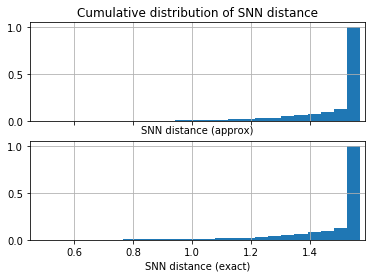

In [17]:
# Histogram of the SNN distances
n_bins = 25
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].hist(dist_arr_approx, bins=n_bins, cumulative=True, histtype='stepfilled', density=True)
ax[0].set_xlabel('SNN distance (approx)')
ax[0].set_title('Cumulative distribution of SNN distance')
ax[0].grid(True)

ax[1].hist(dist_arr_exact, bins=n_bins, cumulative=True, histtype='stepfilled', density=True)
ax[1].set_xlabel('SNN distance (exact)')
ax[1].set_xlim([out[0], 1.01 * out[-1]])
ax[1].grid(True)
plt.show()